<a href="https://colab.research.google.com/github/satou409/SIGNATE-.ipynb/blob/main/SIGNATE%E3%81%8A%E5%BC%81%E5%BD%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
# ファイル読み込み
train = pd.read_csv('/content/drive/MyDrive/SIGNATE/お弁当/train.csv')
test = pd.read_csv('/content/drive/MyDrive/SIGNATE/お弁当/test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


| カラム | ヘッダ名称 | データ型 | 説明 |
|--------|------------|----------|------|
|0| datetime | datetime | インデックスとして使用する日付（yyyy-m-d） |
|1| y | int | 販売数（目的変数） |
|2|	week |	char |	曜日（月～金） |
|3|	soldout |	boolean |	完売フラグ（0:完売せず、1:完売） |
|4|	name |	varchar |	メインメニュー |
|5|	kcal |	int |	おかずのカロリー（kcal）欠損有り |
|6|	remarks |	varchar |	特記事項 |
|7|	event |	varchar |	13時開始お弁当持ち込み可の社内イベント |
|8|	payday |	boolean |	給料日フラグ（1:給料日） |
|9|	weather |	varchar |	天気 |
|10|	precipitation |	float |	降水量。ない場合は "--" |
|11|	temperature |	float |	気温 |

```
# 初見チェック
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object
 1   y              207 non-null    int64  
 2   week           207 non-null    object
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object
 7   event          14 non-null     object
 8   payday         10 non-null     float64
 9   weather        207 non-null    object
 10  precipitation  207 non-null    object
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB
```
|index | datetime |          y | week | soldout | name |                 kcal | remarks | event | payday | weather | precipitation | temperature |      |
|---------:|-----------:|-----:|--------:|-----:|---------------------:|--------:|------:|-------:|--------:|--------------:|------------:|------------:|------|
|     0    | 2013-11-18 |   90 |      月 |    0 |     厚切りイカフライ |     NaN |   NaN |    NaN |     NaN |          快晴 |          -- | 19.8 |
|     1    | 2013-11-19 |  101 |      火 |    1 |       手作りヒレカツ |     NaN |   NaN |    NaN |     NaN |          快晴 |          -- | 17.0 |
|     2    | 2013-11-20 |  118 |      水 |    0 | 白身魚唐揚げ野菜あん |     NaN |   NaN |    NaN |     NaN |          快晴 |          -- | 15.5 |
|     3    | 2013-11-21 |  120 |      木 |    1 |         若鶏ピリ辛焼 |     NaN |   NaN |    NaN |     NaN |          快晴 |          -- | 15.2 |
|     4    | 2013-11-22 |  130 |      金 |    1 |     ビッグメンチカツ |     NaN |   NaN |    NaN |     NaN |          快晴 |          -- | 16.1 |



```
train['remarks'].value_counts()
```
|                                      remarks | count |
|---------------------------------------------:|------:|
|               お楽しみメニュー               |    12 |
|           料理長のこだわりメニュー           |     5 |
|         酢豚（28食）、カレー（85食）         |     1 |
| 鶏のレモンペッパー焼（50食）、カレー（42食） |     1 |
|                  手作りの味                  |     1 |
|          スペシャルメニュー（800円）         |     1 |

```
train['event'].value_counts()
```
|                      event | count |
|---------------------------:|------:|
|          ママの会          |     9 |
| キャリアアップ支援セミナー |     5 |

In [11]:
remarks = test['remarks'].value_counts()
print(remarks)
event = test['event'].value_counts()
print(event)

remarks
お楽しみメニュー          4
料理長のこだわりメニュー      2
近隣に飲食店複合ビルオープン    1
Name: count, dtype: int64
event
キャリアアップ支援セミナー    2
ママの会             1
Name: count, dtype: int64


In [36]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['datetime'] = pd.to_datetime(train['datetime'])
train['weekday_num'] = train['datetime'].dt.weekday  # 0=月曜
train['month'] = train['datetime'].dt.month          # 後で相関見て採用判断

train['payday'] = train['payday'].fillna(0) #給料日じゃない日を0埋め
test['payday'] = test['payday'].fillna(0)
train['event'] = train['event'].fillna('なし') #イベントがない日をなし埋め
test['event'] = test['event'].fillna('なし')

```
test['name'].value_counts()
```
| name                         | count |
|------------------------------|-------|
|           麻婆豆腐           |     2 |
|         ポークカレー         |     2 |
|     豚肉のマスタード焼き     |     1 |
|           麻婆春雨           |     1 |
|          メンチカツ          |     1 |
|      バーベキューチキン      |     1 |
|   完熟トマトのホットカレー   |     1 |
|       厚揚げ肉みそ炒め       |     1 |
|        若鶏梅肉包揚げ        |     1 |
|         豚キムチ炒め         |     1 |
|     豚肉と白菜の中華炒め     |     1 |
|           ヒレカツ           |     1 |
|            豚柳川            |     1 |
|        ミックスグリル        |     1 |
|        ポーク生姜焼き        |     1 |
|      ビーフストロガノフ      |     1 |
|           唐揚げ丼           |     1 |
|          マス塩焼き          |     1 |
|       チンジャオロース       |     1 |
|        厚切イカフライ        |     1 |
|    鶏肉と野菜の黒胡椒炒め    |     1 |
|            八宝菜            |     1 |
|        豚肉の生姜焼き        |     1 |
|          ハンバーグ          |     1 |
|   彩り野菜と鶏肉の黒酢あん   |     1 |
|            親子煮            |     1 |
|  ポークのバーベキューソテー  |     1 |
|         鶏肉の唐揚げ         |     1 |
|        白身魚味噌焼き        |     1 |
|     エビフライ・エビカツ     |     1 |
|     野菜ごろごろシチュー     |     1 |
| ベルギー風チキンのクリーム煮 |     1 |
|         スタミナ炒め         |     1 |
|          ロコモコ丼          |     1 |
|    なすと挽肉のはさみ揚げ    |     1 |
|        鶏肉の治部煮風        |     1 |
|            牛丼風            |     1 |
|   鶏肉のスイートチリソース   |     1 |

```
共通メニュー数: 14
trainだけのメニュー数: 142
testだけのメニュー数: 24
```
| name                 | 完売せず | 完売 |
|----------------------|----------|------|
| チンジャオロース     | 1        | 2    |
| ハンバーグ           | 1        | 0    |
| バーベキューチキン   | 1        | 0    |
| ビーフストロガノフ   | 0        | 1    |
| ポークカレー         | 3        | 0    |
| ポーク生姜焼き       | 1        | 0    |
| メンチカツ           | 3        | 3    |
| ロコモコ丼           | 0        | 1    |
| 八宝菜               | 0        | 1    |
| 厚切イカフライ       | 1        | 0    |
| 親子煮               | 1        | 0    |
| 豚キムチ炒め         | 0        | 1    |
| 豚肉のマスタード焼き | 0        | 1    |
| 豚肉の生姜焼き       | 1        | 0    |

In [13]:
# Filter data after 2014-04
after_april_2014 = train[train['datetime'] >= '2014-04-01']

# Filter for sales of 100 or more
best_sellers = after_april_2014[after_april_2014['y'] >= 100]

# Get unique names of best-selling items
best_seller_names = best_sellers['name'].unique()

print("2014年4月以降に100個以上売れた商品（売れ筋商品）:")
for name in best_seller_names:
    print(name)

2014年4月以降に100個以上売れた商品（売れ筋商品）:
メンチカツ
酢豚
青梗菜牛肉炒め
チキンカレー
牛肉筍煮
ポークカレー
チーズハンバーグ
キーマカレー
ロコモコ丼


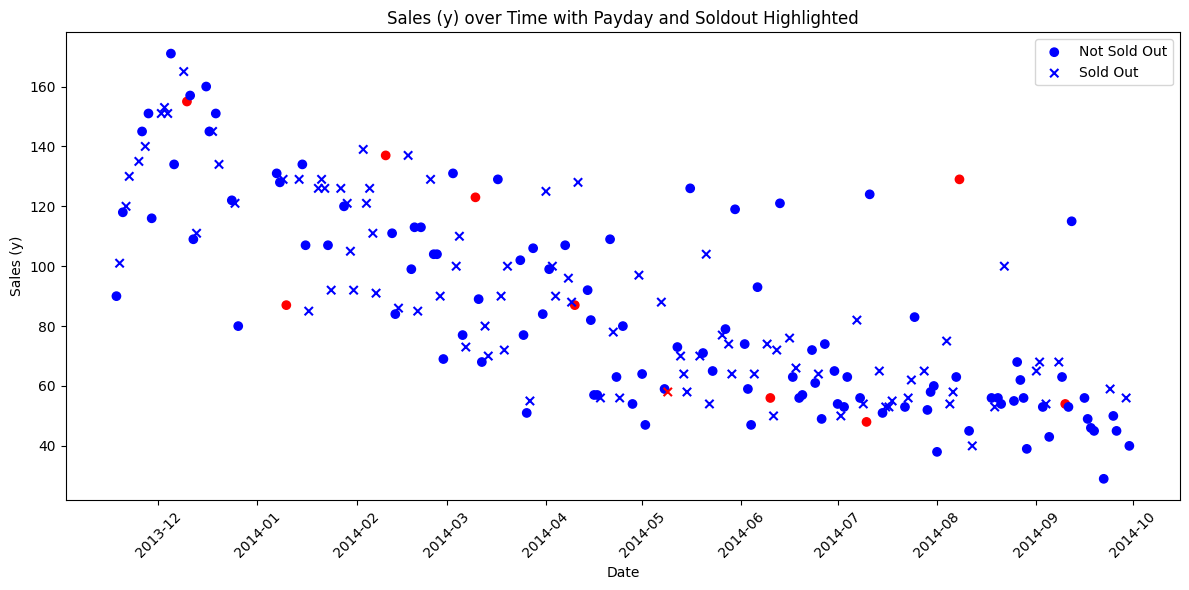

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Map payday to colors, mapping NaN (non-payday) to blue
colors = train['payday'].map({1: 'red'}).fillna('blue')

plt.figure(figsize=(12, 6))

# Plot non-sold-out items with 'o' marker
plt.scatter(train[train['soldout'] == 0]['datetime'], train[train['soldout'] == 0]['y'],
            c=colors[train['soldout'] == 0], marker='o', label='Not Sold Out')

# Plot sold-out items with 'x' marker
plt.scatter(train[train['soldout'] == 1]['datetime'], train[train['soldout'] == 1]['y'],
            c=colors[train['soldout'] == 1], marker='x', label='Sold Out')

plt.title('Sales (y) over Time with Payday and Soldout Highlighted')
plt.xlabel('Date')
plt.ylabel('Sales (y)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
!pip install japanize-matplotlib

import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8d836ad4ddc3116889620d62d58e4d3c46de68fa4098ea8ae7b7f4d3aa5f22bd
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


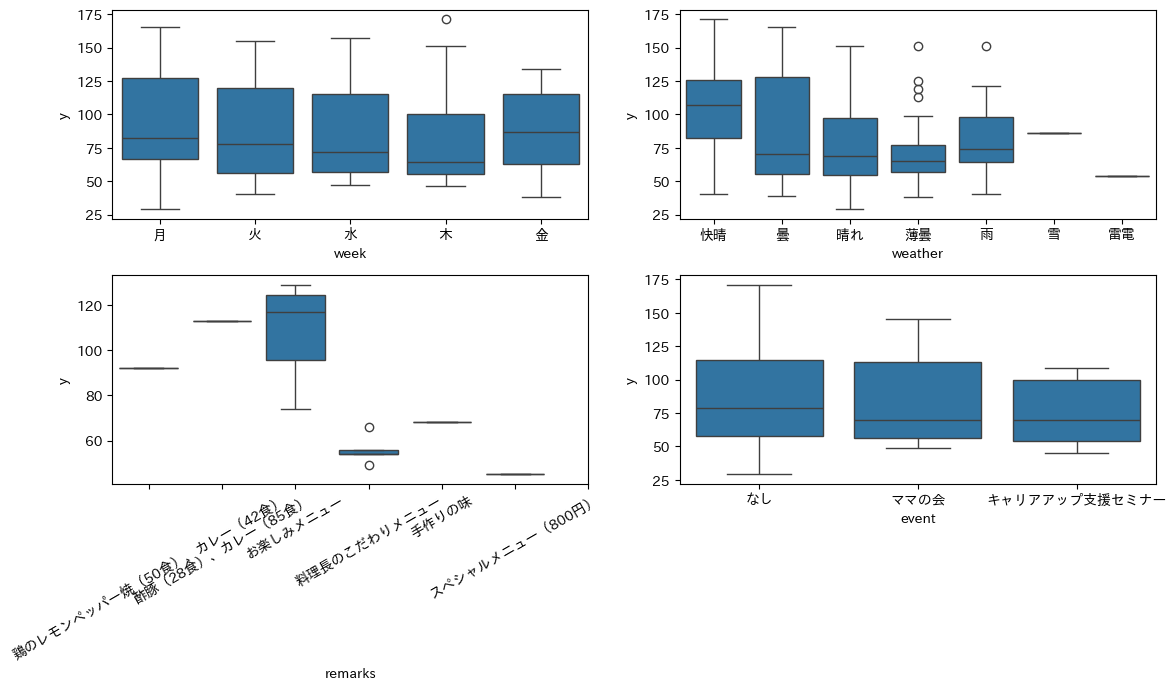

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
# Set ticks explicitly before setting tick labels
ax[1][0].set_xticks(range(len(train['remarks'].unique())))
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.tight_layout()

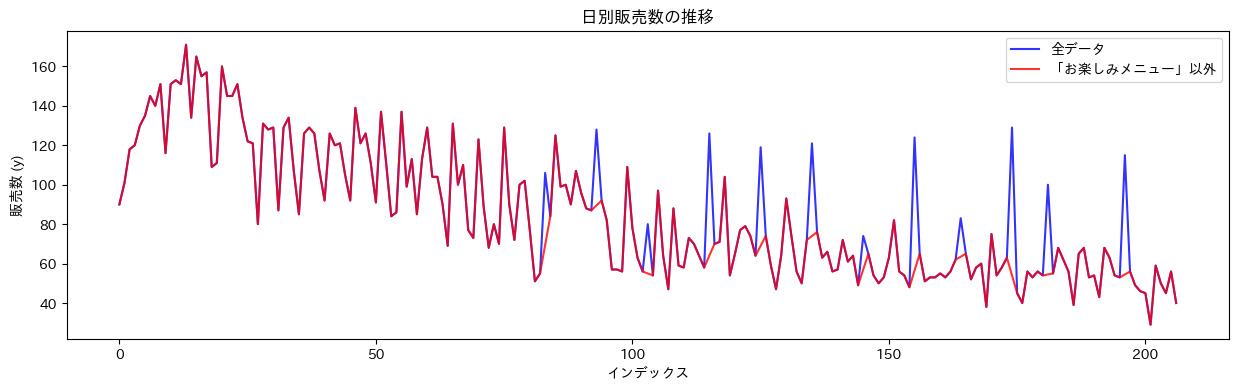

In [28]:
plt.figure(figsize=(15,4))
train["y"].plot(figsize=(15,4), color='blue', alpha=0.8, label='全データ')
train[train["remarks"]!="お楽しみメニュー"]["y"].plot(figsize=(15,4), color='red', alpha=0.8, label='「お楽しみメニュー」以外')
plt.title('日別販売数の推移')
plt.xlabel('インデックス')
plt.ylabel('販売数 (y)')
plt.legend()
plt.show()

In [31]:
fun = train[train["remarks"]=="お楽しみメニュー"]
fun.sort_values('y', ascending=False)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,weekday_num,month
174,2014-08-08,129,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,曇,--,31.1,4,8
93,2014-04-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,快晴,--,16.5,4,4
115,2014-05-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,快晴,--,23.8,4,5
155,2014-07-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,0.0,晴れ,--,33.9,4,7
135,2014-06-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,晴れ,--,29.5,4,6
125,2014-05-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,薄曇,--,26.9,4,5
196,2014-09-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,0.0,晴れ,--,27.3,4,9
83,2014-03-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,快晴,--,18.5,4,3
181,2014-08-22,100,金,1,ロコモコ丼,NaN,お楽しみメニュー,NaN,0.0,晴れ,--,33.1,4,8
164,2014-07-25,83,金,0,ひやしたぬきうどん・炊き込みご飯,NaN,お楽しみメニュー,NaN,0.0,晴れ,--,33.6,4,7


In [33]:
# trainデータで「カレー」が含まれる行を表示
curry_dishes = train[train['name'].str.contains('カレー', na=False)]
display(curry_dishes)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,weekday_num,month
28,2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,--,7.3,1,1
38,2014-01-22,126,水,1,手作りひれかつとカレー,426.0,NaN,NaN,0.0,快晴,--,7.4,2,1
40,2014-01-24,92,金,1,鶏のレモンペッパー焼orカレー,418.0,鶏のレモンペッパー焼（50食）、カレー（42食）,NaN,0.0,快晴,--,10.1,4,1
46,2014-02-03,139,月,1,ハンバーグカレーソース,445.0,NaN,NaN,0.0,晴れ,--,15.9,0,2
59,2014-02-21,113,金,0,酢豚orカレー,410.0,酢豚（28食）、カレー（85食）,ママの会,0.0,快晴,--,8.5,4,2
65,2014-03-03,131,月,0,ハンバーグカレーソース,407.0,NaN,NaN,0.0,曇,--,7.8,0,3
72,2014-03-12,68,水,0,ビーフカレー,370.0,NaN,NaN,0.0,快晴,--,14.8,2,3
83,2014-03-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,0.0,快晴,--,18.5,4,3
93,2014-04-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,NaN,0.0,快晴,--,16.5,4,4
115,2014-05-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,快晴,--,23.8,4,5


In [34]:
train['soldout'].value_counts()

,count
soldout,
0,114
1,93


In [35]:
avg_no_soldout = train[train["soldout"]==0]["y"].mean()
avg_soldout    = train[train["soldout"]==1]["y"].mean()
diff = avg_no_soldout - avg_soldout

avg_no_soldout, avg_soldout, diff


(np.float64(83.71052631578948),
 np.float64(90.19354838709677),
 np.float64(-6.483022071307289))

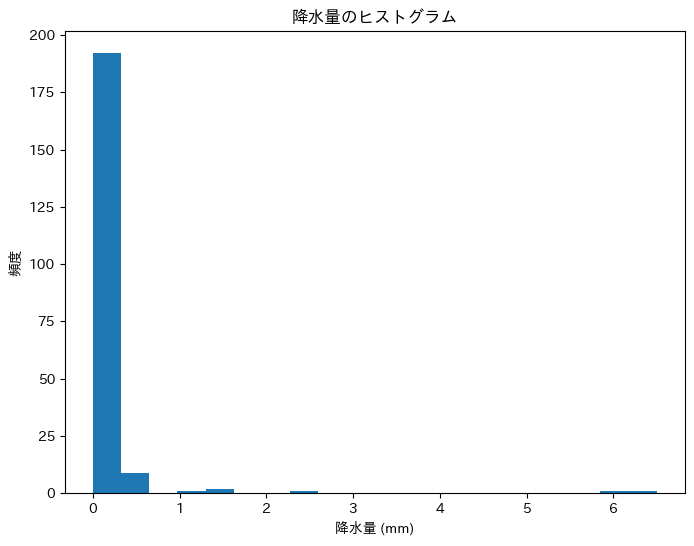

In [38]:
import matplotlib.pyplot as plt

# '--'を0に変換し、データ型を数値型に変換
train['precipitation'] = train['precipitation'].replace('--', 0).astype(float)

# ヒストグラムを作成
plt.figure(figsize=(8, 6))
plt.hist(train['precipitation'], bins=20)
plt.title('降水量のヒストグラム')
plt.xlabel('降水量 (mm)')
plt.ylabel('頻度')
plt.show()

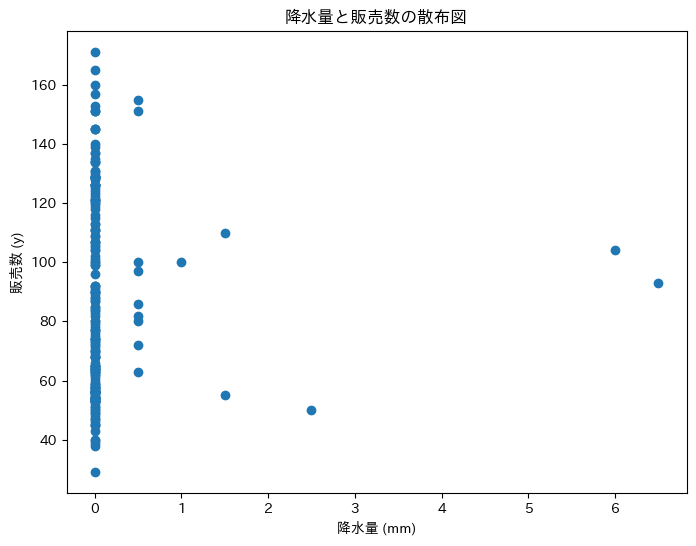

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(train['precipitation'], train['y'])
plt.title('降水量と販売数の散布図')
plt.xlabel('降水量 (mm)')
plt.ylabel('販売数 (y)')
plt.show()